In [97]:
from sklearn.model_selection import train_test_split 
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize 
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

In [98]:
import pandas as pd
import numpy as np
re=np.load(r'2016_19_Consolidated_Features.npz',allow_pickle=True) #unpacking the dataset
d=re['data']
h=re['headers']
df=pd.DataFrame(d,columns=h)
df.head()

,Area Code,16_% aged 0 to 4 years,16_% aged 5 to 14 years,16_% aged 65+ years,16_% aged 75+ years,16_% aged 85+ years,16_% aged under 18 years,16_% reporting good overall experience of making appointment,16_% satisfied with phone access,16_% satisfied with practice appointment times,...,18_% who have a positive experience of their GP practice,18_% with a long-standing health condition,18_% with caring responsibility,18_Deprivation score (IMD 2019),18_IDACI - Income Deprivation Affecting Children Index,18_IDAOPI - Income Deprivation Affecting Older People Index,18_Working status - Paid work or full-time education,18_Working status - Unemployed,Labels_2018,Labels_2019
0,A81001,4.93077,12.0962,23.2451,11.9504,3.2548,20.1846,60.6491,46.5492,63.4716,...,81.4897,52.3763,13.0285,32.3609,0.216611,0.222022,45.1355,10.8287,7.74852,14.7297
1,A81002,4.95606,10.8727,21.3673,9.97854,2.91743,18.7513,71.4819,71.7218,60.0434,...,85.9324,56.6667,8.26464,31.922,0.231698,0.213481,55.8607,10.6176,12.281,9.97503
2,A81004,5.34888,11.0402,19.1468,9.18009,2.68369,19.4522,91.2764,85.7945,81.3391,...,94.1284,42.6156,16.6675,28.024,0.211688,0.204986,67.2361,3.63694,4.48043,2.78484
3,A81005,4.16097,11.1042,28.5058,12.4829,3.92498,18.122,71.7348,68.8784,72.6086,...,92.121,49.0608,21.0062,15.3982,0.143181,0.108996,56.8608,2.09664,7.67015,4.95696
4,A81006,5.60805,12.5484,17.837,7.4842,1.85575,21.297,74.5638,68.2212,75.5383,...,90.6076,63.4425,20.7316,35.6124,0.255719,0.23922,56.682,3.44544,16.9609,11.1103


# Multi-Colinearity

In [99]:
dk=df.drop(['Labels_2019','Area Code'],axis='columns')
y=df.Labels_2019


In [100]:
import statsmodels.api as sm

import scipy.misc
X = sm.add_constant(dk)

c:\users\themo\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [101]:
est = sm.OLS(y.astype(float), X.astype(float)).fit()

In [102]:
est.summary() # here i see P value of each feature and select those that P value is less then 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Labels_2019   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        02:35:55   Log-Likelihood:                -17779.
No. Observations:                6605   AIC:                         3.560e+04
Df Residuals:                    6586   BIC:                         3.572e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -3.4174      1.258     -2.717      0.007      -5.883      -0.952
16_% aged 0 to 4 years                                           0.0437      0.031      1.422      0.155      -0.017       0.104
16_% aged 5 to 14 years                                          0.0087      0.041      0.211      0.833      -0.072       0.090
16_% aged 65+ years                                             -0.0444      0.014     -3.243      0.001      -0.071      -0.018
16_% aged 75+ years                                             -0.1495      0.034     -4.410      0.000      -0.216      -0.083
16_% aged 85+ years                                              0.2790      0.049      5.661      0.000       0.182       0.376
16_% aged under 18 years                                        -0.0679      0.031     -2.201      0.028      -0.128      -0.007
16_% reporting good overall experience of making appointment     0.0013      0.003      0.441      0.659      -0.005       0.007
16_% satisfied with phone access                                -0.0013      0.001     -0.890      0.373      -0.004       0.002
16_% satisfied with practice appointment times                  -0.0104      0.003     -3.823      0.000      -0.016      -0.005
16_% who have a positive experience of their GP practice         0.0168      0.003      5.704      0.000       0.011       0.023
16_% with a long-standing health condition                       0.0879      0.003     33.988      0.000       0.083       0.093
16_% with caring responsibility                                  0.0059      0.004      1.653      0.098      -0.001       0.013
16_Deprivation score (IMD 2019)                                  0.0244      0.005      4.725      0.000       0.014       0.034
16_IDACI - Income Deprivation Affecting Children Index           1.2762      0.675      1.889      0.059      -0.048       2.600
16_IDAOPI - Income Deprivation Affecting Older People Index     -2.5568      0.429     -5.960      0.000      -3.398      -1.716
16_Working status - Paid work or full-time education             0.0079      0.003      2.506      0.012       0.002       0.014
16_Working status - Unemployed                                   0.0331      0.006      5.246      0.000       0.021       0.045
17_% aged 0 to 4 years                                           0.0437      0.031      1.422      0.155      -0.017       0.104
17_% aged 5 to 14 years                                          0.0087      0.041      0.211      0.833      -0.072       0.090
17_% aged 65+ years                                             -0.0444      0.014     -3.243      0.001      -0.071

In [103]:
# after the multicolinearity we have only 41 features out of 56
#https://www.graphpad.com/support/faq/multicollinearity-in-multiple-regression/ says to remove everything with low p value
new=X.drop(['16_% aged 0 to 4 years','16_% aged 5 to 14 years','16_% reporting good overall experience of making appointment',
           '16_% satisfied with phone access','17_% aged 0 to 4 years','17_% aged 5 to 14 years','17_% reporting good overall experience of making appointment',
           '17_% satisfied with phone access','18_% aged 0 to 4 years','18_% aged 5 to 14 years','18_% reporting good overall experience of making appointment',
           '18_% satisfied with phone access','const'],axis=1)
new['label 2019']=y
new

,16_% aged 65+ years,16_% aged 75+ years,16_% aged 85+ years,16_% aged under 18 years,16_% satisfied with practice appointment times,16_% who have a positive experience of their GP practice,16_% with a long-standing health condition,16_% with caring responsibility,16_Deprivation score (IMD 2019),16_IDACI - Income Deprivation Affecting Children Index,...,18_% who have a positive experience of their GP practice,18_% with a long-standing health condition,18_% with caring responsibility,18_Deprivation score (IMD 2019),18_IDACI - Income Deprivation Affecting Children Index,18_IDAOPI - Income Deprivation Affecting Older People Index,18_Working status - Paid work or full-time education,18_Working status - Unemployed,Labels_2018,label 2019
0,23.2451,11.9504,3.2548,20.1846,63.4716,81.4897,52.3763,13.0285,32.3609,0.216611,...,81.4897,52.3763,13.0285,32.3609,0.216611,0.222022,45.1355,10.8287,7.74852,14.7297
1,21.3673,9.97854,2.91743,18.7513,60.0434,85.9324,56.6667,8.26464,31.922,0.231698,...,85.9324,56.6667,8.26464,31.922,0.231698,0.213481,55.8607,10.6176,12.281,9.97503
2,19.1468,9.18009,2.68369,19.4522,81.3391,94.1284,42.6156,16.6675,28.024,0.211688,...,94.1284,42.6156,16.6675,28.024,0.211688,0.204986,67.2361,3.63694,4.48043,2.78484
3,28.5058,12.4829,3.92498,18.122,72.6086,92.121,49.0608,21.0062,15.3982,0.143181,...,92.121,49.0608,21.0062,15.3982,0.143181,0.108996,56.8608,2.09664,7.67015,4.95696
4,17.837,7.4842,1.85575,21.297,75.5383,90.6076,63.4425,20.7316,35.6124,0.255719,...,90.6076,63.4425,20.7316,35.6124,0.255719,0.23922,56.682,3.44544,16.9609,11.1103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,2.12908,0.221779,0.0443557,14.4156,55.704,81.3092,41.3403,8.3804,27.865,0.177407,...,81.3092,41.3403,8.3804,27.865,0.177407,0.315963,82.5328,5.18191,19.1241,17.8172
6601,12.2905,5,1.25698,26.3687,39.8332,58.2895,62.7003,21.8087,31.6164,0.222548,...,58.2895,62.7003,21.8087,31.6164,0.222548,0.186798,64.7748,1.63591,10.768,23.3125
6602,17.098,6.50449,1.81159,23.3609,64.7015,85.5422,40.5186,16.0066,14.894,0.113297,...,85.5422,40.5186,16.0066,14.894,0.113297,0.0968133,61.5345,3.84419,6.16453,3.91107
6603,12.1251,5.06269,1.2379,29.6461,59.1467,82.0563,63.568,22.3149,28.2007,0.230636,...,82.0563,63.568,22.3149,28.2007,0.230636,0.159571,66.4455,1.25695,16.6139,17.4762


In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [105]:
scaled_data = scaler.transform(new)
scaled_data.shape

(6605, 41)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [107]:
x_pca = pca.transform(scaled_data)
x_pca.shape

(6605, 12)

In [108]:

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20,random_state=42)
X_train.shape

(5284, 12)

In [109]:
from sklearn.neighbors import KNeighborsRegressor #here i put n_neighbor = 2 and i  get 65% accuracy
neigh = KNeighborsRegressor(n_neighbors=2,p=2)  # n_neighbor = 1 you get 100% accuracy
neigh.fit(x_pca,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [110]:
pr=neigh.predict(X_test)

In [111]:
neigh.score(X_test,y_test) # you get 65% accuracy

0.8815514754434712

In [112]:
from sklearn.metrics import r2_score
cr=r2_score(y_test,pr)
cr

0.8815514754434712

<ErrorbarContainer object of 3 artists>

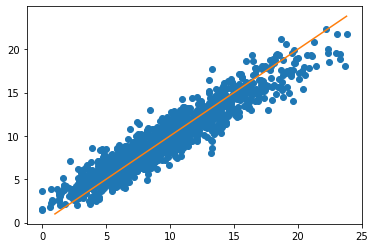

In [113]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(y_test, pr, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])


In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cr=r2_score(y_test,pr)
mae=mean_absolute_error(y_test, pr)
mse=mean_squared_error(y_test,pr)
print("this is R2 score:", cr)
print("This is Mean Absolute Error:", mae)
print("This is Mean squared Error:", mse)


this is R2 score: 0.8815514754434712
This is Mean Absolute Error: 1.164971269000719
This is Mean squared Error: 2.217713981967749


# linear

In [126]:
from sklearn import linear_model
mode=linear_model.LinearRegression()


In [127]:
mode.fit(x_pca,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
mode.coef_

array([-0.14981856,  0.61951025, -0.0304683 , -0.30559906,  1.0716138 ,
       -1.00157612,  1.04662321, -1.20137324, -0.50877312, -0.84494848,
        3.50487512, -0.26147512])

In [129]:
bb=mode.predict(X_test)
bb

array([ 4.72636269,  5.27775069,  4.74545928, ..., 11.1422966 ,
        7.56391142,  9.51027129])

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cr=r2_score(y_test,pr)
mae=mean_absolute_error(y_test, bb)
mse=mean_squared_error(y_test,bb)
print("this is R2 score:", cr)
print("This is Mean Absolute Error:", mae)
print("This is Mean squared Error:", mse)

this is R2 score: 0.8815514754434712
This is Mean Absolute Error: 0.21204807183786742
This is Mean squared Error: 0.07586314167647451


<ErrorbarContainer object of 3 artists>

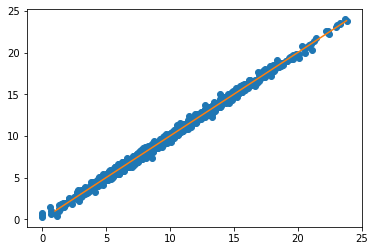

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(y_test, bb, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

# SVR

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
regr=SVR(kernel='rbf')
scores = cross_val_score(regr,x_pca,y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

c:\users\themo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\themo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\themo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

Accuracy: 0.85 (+/- 0.08)
[0.83856725 0.89068966 0.89161317 0.82193233 0.81341627 0.87277999
 0.90550205 0.88804997 0.83624599 0.77219107]


In [133]:
reg.fit(x_pca,y)

c:\users\themo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
reg.score(X_test,y_test)

0.9212072709606832

In [135]:
svrpred=reg.predict(X_test)

<ErrorbarContainer object of 3 artists>

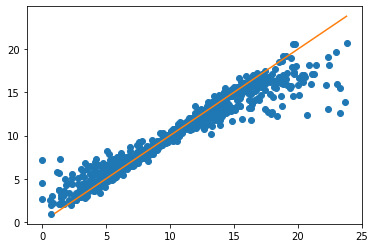

In [136]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(y_test, svrpred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

# Cross validation